# Musk Effect: Main Episodes

### Dependencies

In [569]:
import numpy as np
import pandas as pd
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
from mplfinance.original_flavor import candlestick_ohlc

bitcoin_2021_df = pd.read_csv('data/btc_prices_2021.csv', parse_dates=['Timestamp'])
bitcoin_2024_df = pd.read_csv('data/btc_prices_2024.csv', parse_dates=['Timestamp'])
doge_df = pd.read_csv('data/doge_prices.csv', parse_dates=['Timestamp'])

### Utilities

In [570]:
def plot_chart(df, start_date, end_date, title=None, time_period=None, tweets=None):
    filtered_df = df.set_index('Timestamp').loc[start_date:end_date]
    filtered_df = (
        filtered_df.resample('D')
        .agg({
            'Open': 'first',
            'High': 'max',
            'Low': 'min',
            'Close': 'last',
            'Volume': 'sum',
        })
        .dropna()
    )

    filtered_df['Date'] = filtered_df.index.map(mdates.date2num)
    ohlc_data = filtered_df[['Date', 'Open', 'High', 'Low', 'Close']].reset_index(drop=True).values
    highest_value = filtered_df['High'].max()
    lowest_value = filtered_df['Low'].min()

    fig = plt.figure(figsize=(10, 6))
    gs = fig.add_gridspec(2, 1, height_ratios=[3, 1])
    ax1 = fig.add_subplot(gs[0])
    ax2 = fig.add_subplot(gs[1])

    colorup = '#4CAF50'
    colordown = '#F44336'

    candlestick_ohlc(ax1, ohlc_data, width=0.5, colorup=colorup, colordown=colordown)
    ax1.grid(True, linestyle='-', alpha=0.1, color='black', linewidth=0.5)
    ax1.axhline(highest_value, color=colorup, linestyle='--', linewidth=2, label=f'Highest: {highest_value}')
    ax1.axhline(lowest_value, color=colordown, linestyle='--', linewidth=2, label=f'Lowest: {lowest_value}')
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)
    ax1.xaxis_date()
    ax1.xaxis.set_major_locator(mdates.DayLocator())
    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d'))
    ax1.set_title(title)
    ax1.set_ylabel('Price (USD)')
    ax1.set_xlabel(time_period)
    ax1.legend()

    if tweets:
        for start_date, end_date in tweets:
            i = mdates.date2num(pd.to_datetime(start_date))
            j = mdates.date2num(pd.to_datetime(end_date))
            ax1.axvspan(i, j, color='#1DA1F2', alpha=0.1)

    for i, row in filtered_df.iterrows():
        if row['Close'] > row['Open']:
            color = colorup
        else:
            color = colordown
        
        ax2.bar(i, row['Volume'], color=color)

    ax2.grid(True, axis='y', linestyle='-', alpha=0.1, color='black', linewidth=0.5)
    ax2.set_ylabel('Volume')
    ax2.set_xlabel(time_period)
    ax2.spines['top'].set_visible(False)
    ax2.spines['right'].set_visible(False)
    ax2.xaxis.set_major_locator(mdates.DayLocator())
    ax2.xaxis.set_major_formatter(mdates.DateFormatter('%d'))

    plt.tight_layout()
    plt.show()

### Tesla Episode

1. On **February 8, 2021**, Tesla revealed it had bought $1.5 billion worth of Bitcoin and planned to accept it as payment for vehicles, driving the price to $44,141. On **February 18, 2021**, Musk commented that owning Bitcoin was only slightly better than holding traditional cash, but still a superior asset.

3. However, on **May 12, 2021**, Tesla reversed its stance, halting Bitcoin payments due to concerns over the environmental impact of cryptocurrency mining. This announcement led to a 12% drop in Bitcoin's price the following day.

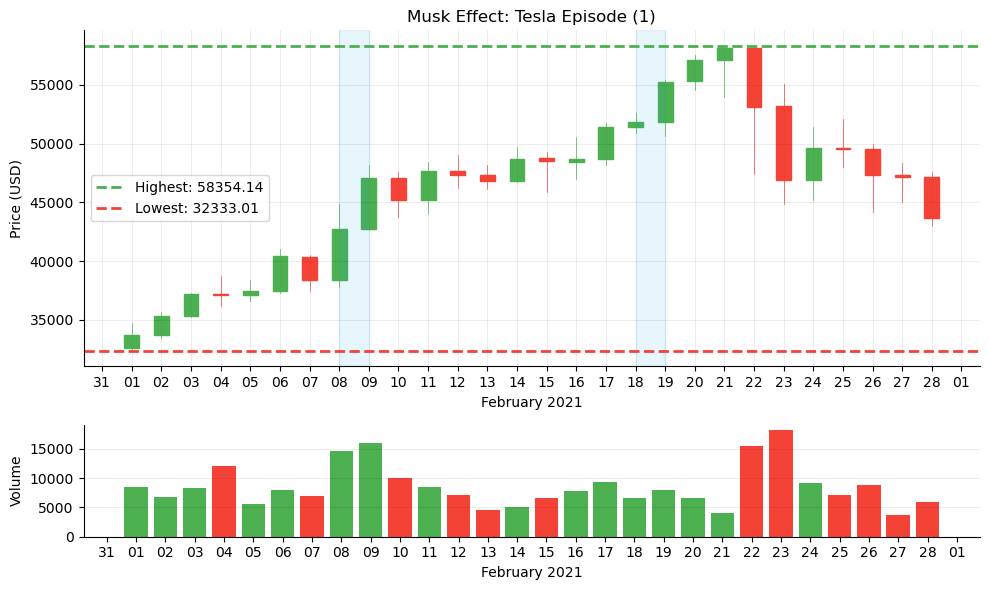

In [571]:
start_date = '2021-02-01'
end_date = '2021-02-28'
title = 'Musk Effect: Tesla Episode (1)'
time_period = 'February 2021'
tweets = [
    ('2021-02-08', '2021-02-09'),
    ('2021-02-18', '2021-02-19')
]
plot_chart(bitcoin_2021_df, start_date, end_date, title, time_period, tweets)

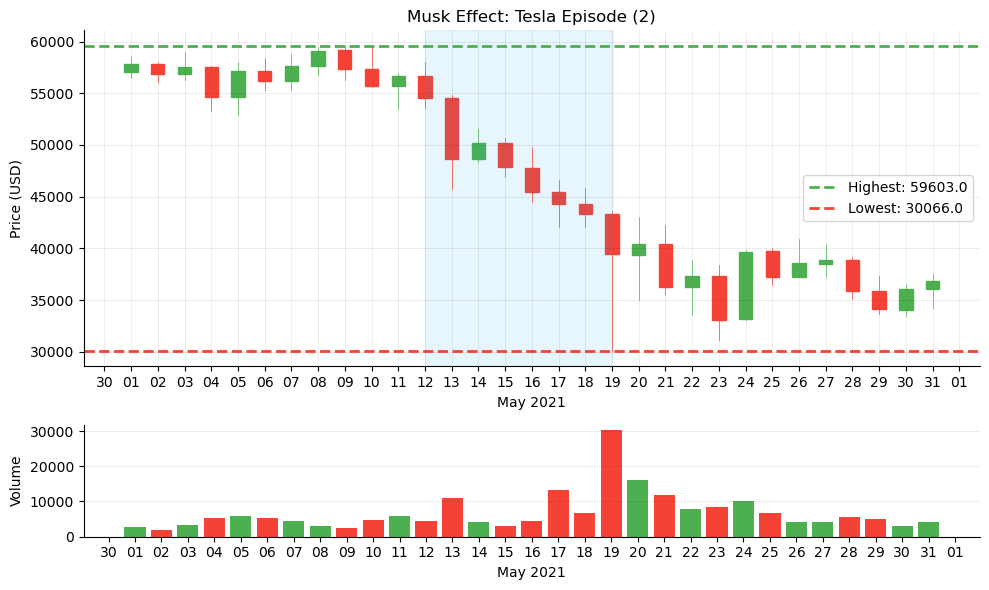

In [572]:
start_date = '2021-05-01'
end_date = '2021-05-31'
title = 'Musk Effect: Tesla Episode (2)'
time_period = 'May 2021'
tweets = [('2021-05-12', '2021-05-19')]
plot_chart(bitcoin_2021_df, start_date, end_date, title, time_period, tweets)

### DOGE

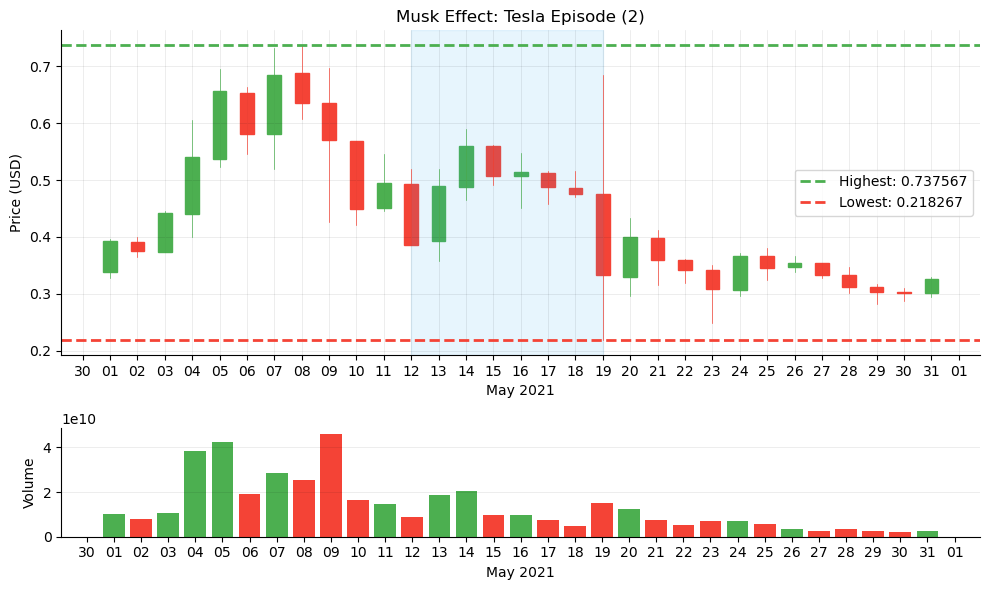

In [573]:
start_date = '2021-05-01'
end_date = '2021-05-31'
title = 'Musk Effect: Tesla Episode (2)'
time_period = 'May 2021'
tweets = [('2021-05-12', '2021-05-19')]
plot_chart(doge_df, start_date, end_date, title, time_period, tweets)

### December 2024: Appointment in Trump's Administration

### Following President-elect Donald Trump's victory, Musk was appointed to lead the newly established Department of Government Efficiency (DOGE). This appointment, along with Trump's crypto-friendly policies, contributed to a significant surge in Bitcoin's value, reaching an all-time high of $100,000. 

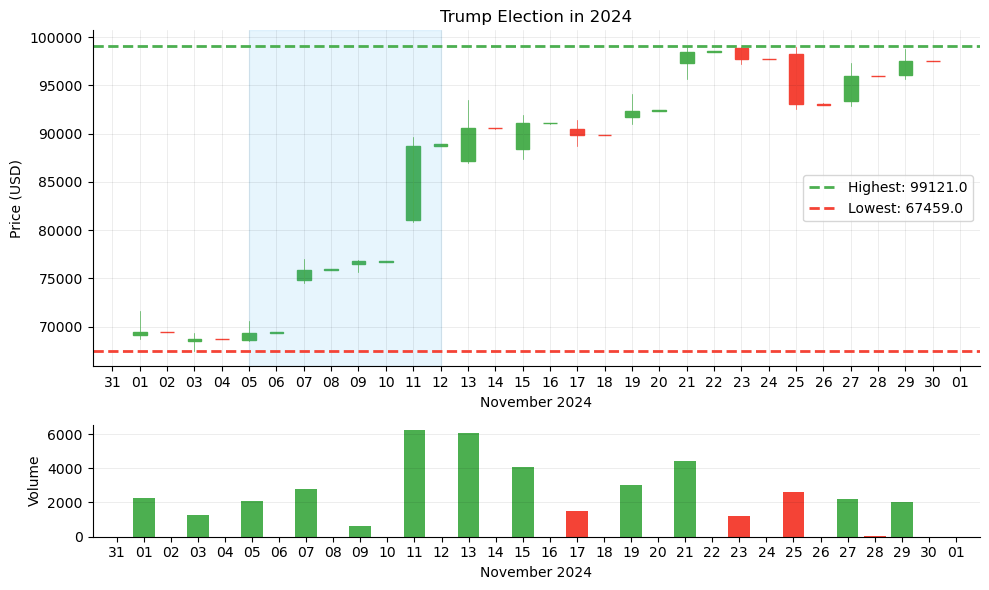

In [574]:
start_date = '2024-11-01'
end_date = '2024-11-30'
title = 'Trump Election in 2024'
time_period = 'November 2024'
tweets = [('2024-11-05', '2024-11-12')]
plot_chart(bitcoin_2024_df, start_date, end_date, title, time_period, tweets)